<h1 style="text-align:center"> Computational Geometry </h1>
<h1 style="text-align:center"> Project 3 </h1>
<h2 style="text-align:center"> Spring 2019-20 </h2>

<h3>Participants</h3>

The current projects was written by the following:

<ul>
    <li>Lekkas Nikolaos - 1115201600089</li>
    <li>Lykos Emmanouil - 1115201600096</li>
</ul>

## Exercise 1

<i>Compute Voronoi diagrams of different sets of vertices of your choice using the routine Voronoi (and its companion voronoi plot 2d for visualization) from the module scipy.spatial. Plot your results.</i>

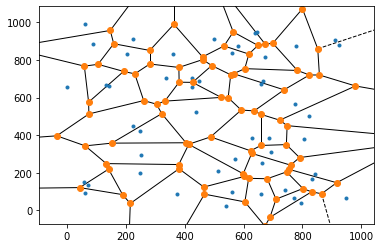

In [1]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import random
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

num_points = 50

points = np.array([[random.randint(0, 1000),random.randint(0, 1000)] for i in range(num_points)])

vor = Voronoi(points)
voronoi_plot_2d(vor)
plt.show()


We will test what we will get for the special case that data are forming a circle. As we will se below we get a Voronoi Diagram with one vertex, where all the edges touches it.

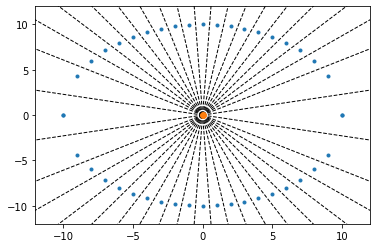

In [2]:
radius = 10
points = [(x, sqrt(radius*radius - x*x)) for x in range(-1*radius, radius+1)]
points += [(x, -1*sqrt(radius*radius - x*x)) for x in range(-1*radius, radius+1)]

vor = Voronoi(points)
voronoi_plot_2d(vor)
plt.show()

## Exercise 2

<i>Using the routine Delaunay in the module scipy.spatial compute the Delaunay triangulation of different sets of vertices of your choice and plot your results.</i>

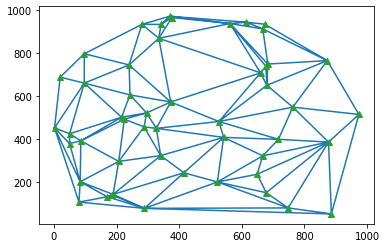

In [3]:
from scipy.spatial import Delaunay
import random
import numpy as np
import matplotlib.pyplot as plt

num_points = 50

points = np.array([[random.randint(0, 1000),random.randint(0, 1000)] for i in range(num_points)])

delaunay = Delaunay(points)
plt.triplot(points[:,0], points[:,1],delaunay.simplices)
plt.plot(points[:,0], points[:,1], '^')
plt.show()

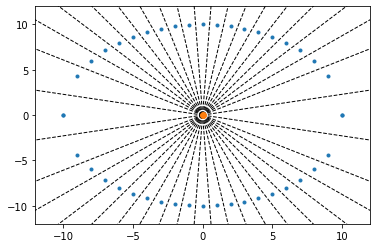

In [4]:
radius = 10
points = [(x, sqrt(radius*radius - x*x)) for x in range(-1*radius, radius+1)]
points += [(x, -1*sqrt(radius*radius - x*x)) for x in range(-1*radius, radius+1)]

vor = Voronoi(points)
voronoi_plot_2d(vor)
plt.show()

As we can see the Dalaunay Triangulation of a set of points that belong in a circle is the same as the Voronoi Diagram.

## Exercise 3

<i>Compute the shortest path of different set of vertices of your choice in a triangulation. By a path in this setting, we mean a chain of edges of this triangulation. Use the methods in the package scipy.sparse.csgraph.</i>

In [5]:
from scipy.sparse.csgraph import shortest_path
from scipy.sparse import csr_matrix
import random
import numpy as np
import matplotlib.pyplot as plt

num_points = 5

#For each point we have an array with the distances of our points from the rest points
points = []
for i in range(num_points):
    distances=[]
    for j in range(num_points):
        #Random distance from another point
        if(i != j):
            distances.append(random.randint(1,100))
        #Zero distance from ourselves 
        else:
            distances.append(0)
    points.append(distances)
print("Points:",points)

#Create graph
graph = csr_matrix(points)
print("Graph:\n", graph)

#Evaluate shortest distance from point <indices> to every other point 
#with shortert_path in an undirected graph
dist_matrix, predecessors = shortest_path(csgraph=graph, directed=False, indices=0, return_predecessors=True)
print("Distance Matrix:", dist_matrix)


Points: [[0, 63, 24, 86, 83], [51, 0, 7, 76, 69], [23, 74, 0, 3, 44], [11, 2, 74, 0, 48], [70, 41, 26, 97, 0]]
Graph:
   (0, 1)	63
  (0, 2)	24
  (0, 3)	86
  (0, 4)	83
  (1, 0)	51
  (1, 2)	7
  (1, 3)	76
  (1, 4)	69
  (2, 0)	23
  (2, 1)	74
  (2, 3)	3
  (2, 4)	44
  (3, 0)	11
  (3, 1)	2
  (3, 2)	74
  (3, 4)	48
  (4, 0)	70
  (4, 1)	41
  (4, 2)	26
  (4, 3)	97
Distance Matrix: [ 0. 13. 14. 11. 40.]


# Exercise 4

<i>Experiment yourself with the .encloses_point and .encloses methods of the sympy.geometry module usingf polygons or circles to check if they contain certain points of your choice. Do the same with contains point or contains points from the Path class from the libraries of matplotlib.path. </i>

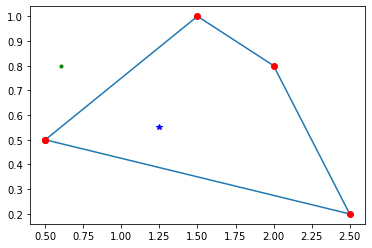

Sumpy:
Polygon encloses: (1.25, 0.55)
Polygon does not enclose : (0.6, 0.8)
Polygon does not enclose itself

Matplot:
Polygon contains: (1.25, 0.55)
Polygon does not contain : (0.6, 0.8)
Polygon does not contain all points


In [6]:
import numpy as np
from sympy.geometry import *
from sympy.plotting.pygletplot import PygletPlot as Plot
import matplotlib.pyplot as plt
import matplotlib.path as mpltPath

def enclosesPoint(poly,point):
    if poly.encloses_point(point):
        print("Polygon encloses:", point)
    else :
        print("Polygon does not enclose :", point)

def enclosesPoly(poly):
    if poly.encloses(poly):
        print("Polygon encloses itself")
    else :
        print("Polygon does not enclose itself")

def containsPoint(path,point):
    if path.contains_point(list(point),radius=0.1):
        print("Polygon contains:", point)
    else :
        print("Polygon does not contain :", point)

def containsPoly(path,points):
    if np.all(path.contains_points(points,radius=0.1)):
        print("Polygon contains all points")
    else :
        print("Polygon does not contain all points")

def plotPoly(points,poly,p1, p2):
    xValues = [p[0] for p in points]
    yValues = [p[1] for p in points]

    #Print polygon
    plt.plot(xValues,yValues)
    plt.plot(xValues,yValues,'ro')
    plt.plot(p1[0],p1[1],'b*')
    plt.plot(p2[0],p2[1],'g.')
    plt.show()
 
    print("Sumpy:")
    enclosesPoint(poly,p1)
    enclosesPoint(poly,p2)
    enclosesPoly(poly)
    print()
    print("Matplot:")
    path = mpltPath.Path(points)
    containsPoint(path,p1)
    containsPoint(path,p2)
    containsPoly(path,points)



points = [(0.5,0.5),(1.5,1.0), (2,0.8), (2.5,0.2), (0.5,0.5)]
pInside = (1.25,0.55)
pOutside = (0.6,0.8)

poly = Polygon(points[0], points[1], points[2], points[3])
plotPoly(points,poly, pInside, pOutside)

## Exercise 5

<i>The problem of finding the Voronoi cell that contains a given location is equivalent to the search for the nearest neighbor. We can always perform this search with a brute force algorithm, but in general there are more elegant and less complex approaches to this problem like the kd-trees. In the scipy use the class KDTree to perform some experiments of your choice.</i>

In [7]:
from scipy.spatial import KDTree as KDTree
import random

num_points = 5

points = np.array([[random.randint(0, 100),random.randint(0, 100)] for i in range(num_points)])

kdTree = KDTree(points)
searchedPoint = [50, 40]
distance = kdTree.query(searchedPoint)
print("Min distance:",distance[0])
print("NN in kd-Tree :",kdTree.data[distance[1]])

Min distance: 30.0
NN in kd-Tree : [74 58]
